In [69]:
import os
os.chdir(r'C:\Users\nadda\Desktop\KU\01204314-65-Statistics-for-Computer-Engineering-Applications\week11\homework')
os.getcwd()

'C:\\Users\\nadda\\Desktop\\KU\\01204314-65-Statistics-for-Computer-Engineering-Applications\\week11\\homework'

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
#https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data
orig_df = pd.read_csv("meat_diary_oils_seafood_fruits.csv")
orig_df.head()

,Food Name,Category Name,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,...,Vitamin A RAE,Vitamin B1,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Zinc,Manganese
0,Acerola,Fruits,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,...,0.000038,0.00002,0.0,0.00006,0.00040,0.00031,0.00001,1.6780,0.00010,NaN
1,Apple,Fruits,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,...,0.000003,0.00002,0.0,0.00003,0.00009,0.00006,0.00004,0.0046,0.00004,0.00004
2,Apricot,Fruits,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,...,0.000096,0.00003,0.0,0.00004,0.00060,0.00024,0.00005,0.0100,0.00020,0.00008
3,Dried fruit,Fruits,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,...,0.000180,0.00002,0.0,0.00007,0.00260,0.00052,0.00014,0.0010,0.00039,0.00024
4,Avocado,Fruits,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,...,0.000007,0.00007,0.0,0.00013,0.00170,0.00140,0.00026,0.0100,0.00064,0.00014


In [73]:
orig_df.shape

(384, 32)

In [74]:
orig_df.dtypes

Food Name               object
Category Name           object
Calcium                float64
Calories               float64
Carbs                  float64
Cholesterol            float64
Copper                 float64
Fats                   float64
Fiber                  float64
Folate                 float64
Iron                   float64
Magnesium              float64
Monounsaturated Fat    float64
Net carbs              float64
Phosphorus             float64
Polyunsaturated fat    float64
Potassium              float64
Protein                float64
Saturated Fat          float64
Selenium               float64
Sodium                 float64
Vitamin A (IU)         float64
Vitamin A RAE          float64
Vitamin B1             float64
Vitamin B12            float64
Vitamin B2             float64
Vitamin B3             float64
Vitamin B5             float64
Vitamin B6             float64
Vitamin C              float64
Zinc                   float64
Manganese              float64
dtype: o

In [75]:
orig_df["Food Name"].unique()

array(['Acerola', 'Apple', 'Apricot', 'Dried fruit', 'Avocado', 'Banana',
       'Blackberry', 'Blueberry', 'Boysenberries', 'Breadfruit',
       'Carambola', 'Cherimoya', 'Cherry', 'Crabapple (Malus)',
       'Cranberry', 'Currant', 'Custard apple', 'Dates', 'Elderberry',
       'Figs', 'Fruit salad', 'Gooseberry', 'Goji berries', 'Grapefruit',
       'Grape', 'Peruvian groundcherry', 'Guava', 'Jackfruit',
       'Java plum', 'Jujube', 'Kiwifruit', 'Kumquat', 'Lemon', 'Lime',
       'Lychee', 'Loganberries', 'Longan', 'Loquat', 'Mango',
       'Purple mangosteen', 'Cantaloupe', 'Melon', 'Honeydew', 'Mulberry',
       'Nectarine', 'Orange', 'Mandarin orange', 'Papaya',
       'Passion fruit', 'Peach', 'Pear', 'Persimmon', 'Pineapple',
       'Pitanga (Surinam cherry)', 'Plantain', 'Plum', 'Pomegranate',
       'Prickly pear', 'Prunes', 'Pomelo', 'Quince', 'Raisin', 'Rambutan',
       'Raspberry', 'Roselle', 'Rose apple', 'Sapodilla', 'Mamey Sapote',
       'Soursop', 'Strawberry', 'Tam

In [76]:
# Original, there 11 features (variables) and 1 output ('Item_Outlet_Sales').
# To increase number of features, we change categorcial data column to numerical data.
# To turn categorcial data column, get_dummies function is used.
# Example: if there exists 1 feature column called gender with 2 values {male, female}, 
#         get_dummies function will converts to 2 columns: gender_male, gender_female (with values 0,1)

# Note that 'Item_Identifier', 'Outlet_Identifier' are IDs; they have too many unique values 
# If we convert these two columns to numerical data, we will get too many resulting columns 
# Hence, we will drop these two columns

df=orig_df.copy()
temp_df=df.drop(['Food Name'], axis=1)

dummy_df=pd.get_dummies(temp_df)  
dummy_df.columns  
# dummy_df has 35 columns 

Index(['Calcium', 'Calories', 'Carbs', 'Cholesterol', 'Copper', 'Fats',
       'Fiber', 'Folate', 'Iron', 'Magnesium', 'Monounsaturated Fat',
       'Net carbs', 'Phosphorus', 'Polyunsaturated fat', 'Potassium',
       'Protein', 'Saturated Fat', 'Selenium', 'Sodium', 'Vitamin A (IU)',
       'Vitamin A RAE', 'Vitamin B1', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Zinc',
       'Manganese', 'Category Name_Dairy', 'Category Name_Fruits',
       'Category Name_Meat', 'Category Name_Oils and Sauces',
       'Category Name_Seafood'],
      dtype='object')

In [77]:
input_vars = ['Calcium', 'Carbs', 'Cholesterol', 'Copper', 'Fats',
       'Fiber', 'Folate', 'Iron', 'Magnesium', 'Monounsaturated Fat',
       'Net carbs', 'Phosphorus', 'Polyunsaturated fat', 'Potassium',
       'Protein', 'Saturated Fat', 'Selenium', 'Sodium', 'Vitamin A (IU)',
       'Vitamin A RAE', 'Vitamin B1', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Zinc',
       'Manganese', 'Category Name_Dairy', 'Category Name_Fruits',
       'Category Name_Meat', 'Category Name_Oils and Sauces',
       'Category Name_Seafood']
len(input_vars)

34

In [78]:
# Perform regresssion with original 35 independent variables

df = dummy_df.dropna()
X = df[input_vars]
y = df.Calories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[27.13374795495167, 0.9827764661245804]

# Filter Methods

## Missing Value Ratio

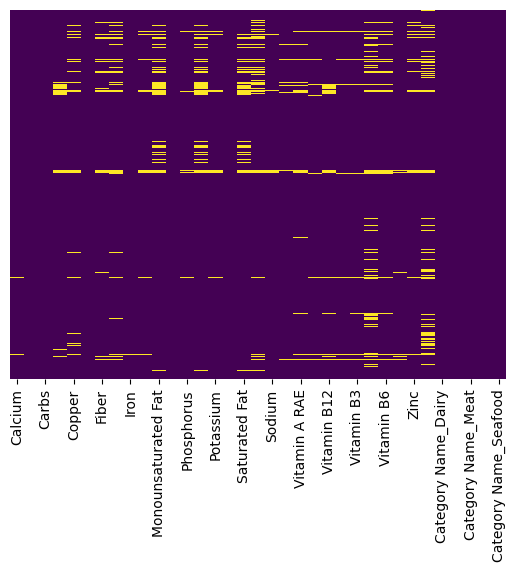

In [79]:
# Use heatmap to visualize missing value (null) positions
df=dummy_df.copy()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [80]:
# Find missing value percent for each variable
null_percent = df.isnull().sum()/len(df)*100
null_percent

Calcium                           0.520833
Calories                          0.000000
Carbs                             0.000000
Cholesterol                       4.947917
Copper                            5.208333
Fats                              0.000000
Fiber                             4.947917
Folate                            7.031250
Iron                              0.260417
Magnesium                         2.864583
Monounsaturated Fat              10.156250
Net carbs                         0.000000
Phosphorus                        1.302083
Polyunsaturated fat              10.156250
Potassium                         2.343750
Protein                           0.000000
Saturated Fat                     9.375000
Selenium                          9.375000
Sodium                            1.562500
Vitamin A (IU)                    2.083333
Vitamin A RAE                     4.427083
Vitamin B1                        2.083333
Vitamin B12                       5.208333
Vitamin B2 

In [81]:
for x in input_vars:
    if df[x][0].dtype != 'Object':
        df[x] = df[x].fillna(df[x].mean())
    else:
        df[x] = df[x].fillna(df[x].mode()[0])

In [82]:
# After replacing missing values, re-check %missing data
df.isnull().sum()/len(df)*100

Calcium                          0.0
Calories                         0.0
Carbs                            0.0
Cholesterol                      0.0
Copper                           0.0
Fats                             0.0
Fiber                            0.0
Folate                           0.0
Iron                             0.0
Magnesium                        0.0
Monounsaturated Fat              0.0
Net carbs                        0.0
Phosphorus                       0.0
Polyunsaturated fat              0.0
Potassium                        0.0
Protein                          0.0
Saturated Fat                    0.0
Selenium                         0.0
Sodium                           0.0
Vitamin A (IU)                   0.0
Vitamin A RAE                    0.0
Vitamin B1                       0.0
Vitamin B12                      0.0
Vitamin B2                       0.0
Vitamin B3                       0.0
Vitamin B5                       0.0
Vitamin B6                       0.0
V

In [83]:
df.head()

,Calcium,Calories,Carbs,Cholesterol,Copper,Fats,Fiber,Folate,Iron,Magnesium,...,Vitamin B5,Vitamin B6,Vitamin C,Zinc,Manganese,Category Name_Dairy,Category Name_Fruits,Category Name_Meat,Category Name_Oils and Sauces,Category Name_Seafood
0,0.012,32.0,7.7,0.0,0.00009,0.30,1.1,0.000014,0.00020,0.018,...,0.00031,0.00001,1.6780,0.00010,0.000152,False,True,False,False,False
1,0.006,52.0,14.0,0.0,0.00003,0.17,2.4,0.000003,0.00012,0.005,...,0.00006,0.00004,0.0046,0.00004,0.000040,False,True,False,False,False
2,0.013,48.0,11.0,0.0,0.00008,0.39,2.0,0.000009,0.00039,0.010,...,0.00024,0.00005,0.0100,0.00020,0.000080,False,True,False,False,False
3,0.055,241.0,63.0,0.0,0.00034,0.51,7.3,0.000010,0.00270,0.032,...,0.00052,0.00014,0.0010,0.00039,0.000240,False,True,False,False,False
4,0.012,160.0,8.5,0.0,0.00019,15.00,6.7,0.000081,0.00055,0.029,...,0.00140,0.00026,0.0100,0.00064,0.000140,False,True,False,False,False


In [84]:
## Perform regresssion with 35 original independent features
##         where missing values in Item_Weight is replaced with its mean

X = df[input_vars]
y = df.Calories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[7.119700045800316, 0.9989349181142649]

In [85]:
df = dummy_df.copy()
acceptable_missing_ratio = 10
updated_vars = []
for i in range(0,len(input_vars)):  
    # if %missing value of this feature is less than or at least threshold, keep this feature
    if null_percent.iloc[i] <= acceptable_missing_ratio :          
        updated_vars.append(input_vars[i])
updated_vars

['Calcium',
 'Carbs',
 'Cholesterol',
 'Copper',
 'Fats',
 'Fiber',
 'Folate',
 'Iron',
 'Magnesium',
 'Monounsaturated Fat',
 'Phosphorus',
 'Polyunsaturated fat',
 'Protein',
 'Saturated Fat',
 'Selenium',
 'Sodium',
 'Vitamin A (IU)',
 'Vitamin A RAE',
 'Vitamin B1',
 'Vitamin B12',
 'Vitamin B2',
 'Vitamin B3',
 'Vitamin B5',
 'Vitamin C',
 'Zinc',
 'Manganese',
 'Category Name_Fruits',
 'Category Name_Meat',
 'Category Name_Oils and Sauces',
 'Category Name_Seafood']

In [86]:
len(updated_vars) 
# Since one column (Item_weight) has %missing data > 15%, number of features decreases from 35 to 34.

30

In [87]:
for x in input_vars:
    if df[x][0].dtype != 'Object':
        df[x] = df[x].fillna(df[x].mean())
    else:
        df[x] = df[x].fillna(df[x].mode()[0])

In [88]:
## Perform regresssion with 34 independent variables
##         Item_Weight with %missing values above threshold is dropped

X = df[updated_vars]
y = df.Calories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[6.2103220205905965, 0.9991896216231858]

## Low Variance Filtering

In [89]:
# Compute variance of each feature
df = dummy_df.copy().dropna()
df.var().sort_values(ascending=False)

Vitamin A (IU)                   7.570185e+06
Calories                         3.180495e+04
Fats                             4.354305e+02
Carbs                            1.537483e+02
Net carbs                        1.340756e+02
Protein                          1.115599e+02
Monounsaturated Fat              9.910115e+01
Saturated Fat                    8.257682e+01
Polyunsaturated fat              2.683947e+01
Fiber                            2.527423e+00
Sodium                           5.395126e-01
Category Name_Meat               2.039323e-01
Category Name_Seafood            1.854698e-01
Category Name_Dairy              1.575553e-01
Category Name_Fruits             1.345877e-01
Category Name_Oils and Sauces    1.036950e-01
Calcium                          3.944457e-02
Potassium                        3.918942e-02
Phosphorus                       2.259570e-02
Cholesterol                      2.080215e-02
Magnesium                        7.615108e-04
Vitamin C                        3

In [90]:
min_var_threshold = 10
updated_vars = [ ]
for i in range(0,len(df[input_vars].var())):

    if df[input_vars].var().iloc[i] >= min_var_threshold:   
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Carbs',
 'Fats',
 'Monounsaturated Fat',
 'Net carbs',
 'Polyunsaturated fat',
 'Protein',
 'Saturated Fat',
 'Vitamin A (IU)']

In [91]:
# Above, there are 3 features with variance >= minimum variance threshold
# Create new data frame with these 3 features and 1 output

df2 = df[updated_vars]
df2['Calories']=df['Calories']
df2.head()

C:\Users\nadda\AppData\Local\Temp\ipykernel_10456\1561887200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Calories']=df['Calories']


,Carbs,Fats,Monounsaturated Fat,Net carbs,Polyunsaturated fat,Protein,Saturated Fat,Vitamin A (IU),Calories
1,14.0,0.17,0.01,11.0,0.05,0.26,0.03,54.0,52.0
2,11.0,0.39,0.17,9.1,0.08,1.40,0.03,1279.0,48.0
3,63.0,0.51,0.07,55.0,0.07,3.40,0.02,3604.0,241.0
4,8.5,15.00,9.80,1.8,1.80,2.00,2.10,146.0,160.0
5,23.0,0.33,0.03,20.0,0.07,1.10,0.11,64.0,89.0


In [92]:
df2 = df2.dropna()
X = df2[updated_vars]
y = df2.Calories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.609324138442551, 0.9995029761946536]

## High Correlation Filtering

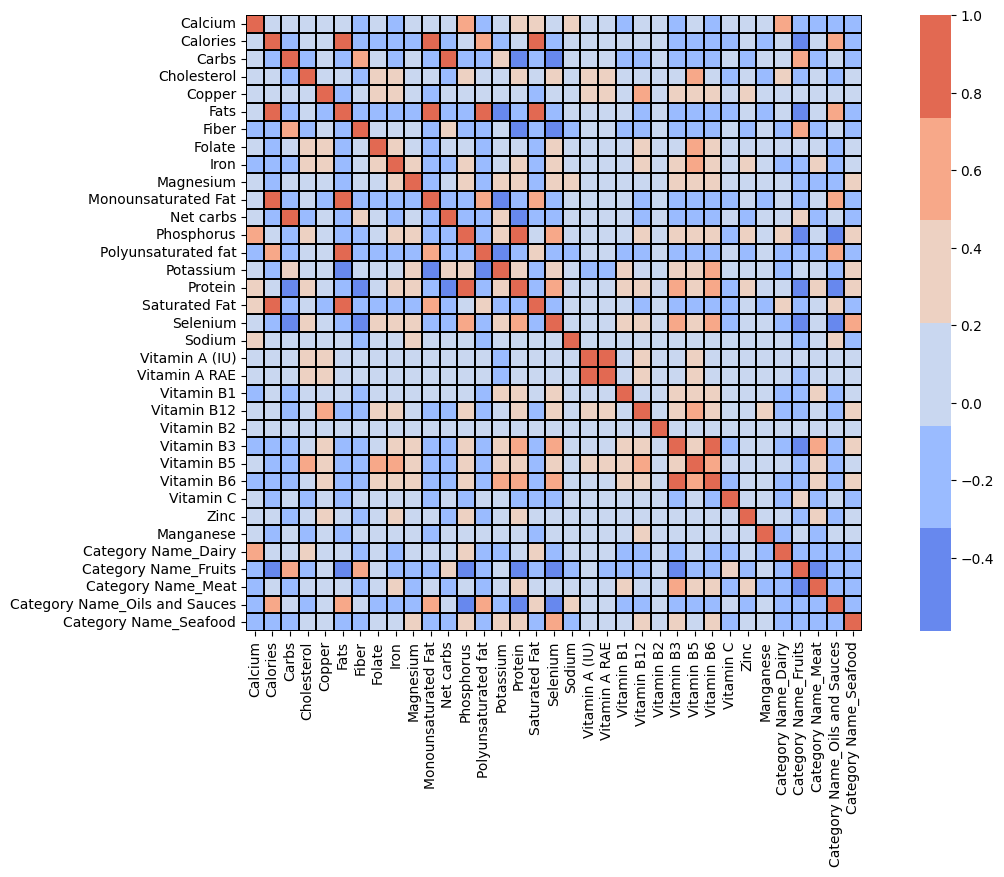

In [93]:
# Plot correlation of numerical data
df = dummy_df.copy()
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),
            square=True,
            linewidths=0.25,    
            linecolor=(0,0,0),
            cmap=sns.color_palette("coolwarm"),
            annot=False)
plt.show()

In [94]:
corr_df = df.corr()
corr_df['Category Name_Fruits']

Calcium                         -0.164789
Calories                        -0.384284
Carbs                            0.488591
Cholesterol                     -0.298988
Copper                          -0.054399
Fats                            -0.332567
Fiber                            0.628375
Folate                          -0.024747
Iron                            -0.190209
Magnesium                       -0.124898
Monounsaturated Fat             -0.265678
Net carbs                        0.421343
Phosphorus                      -0.493135
Polyunsaturated fat             -0.172601
Potassium                       -0.022696
Protein                         -0.588094
Saturated Fat                   -0.265589
Selenium                        -0.427561
Sodium                          -0.258881
Vitamin A (IU)                  -0.020022
Vitamin A RAE                   -0.064965
Vitamin B1                      -0.185581
Vitamin B12                     -0.162228
Vitamin B2                      -0

In [95]:
## Perform regresssion with 35 original independent variables

df = df.dropna()
X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[27.13374795495167, 0.9827764661245804]

In [96]:
df.shape

(282, 35)

In [97]:
'''
Highly Correlate Pair
Protein กับ Phosphorus
Protein กับ Fiber
Protein กับ Carb
Fats กับ Saturated Fat
Fats กับ Monounsaturated Fat
Fats กับ Polyunsaturated Fat
'''

updated_vars = list(input_vars)
updated_vars.remove('Fats')
len(updated_vars )

33

In [98]:
df = df.dropna()
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[81.44830926573418, 0.8448088906894944]

In [99]:
df=dummy_df.copy()
df=df.drop('Protein', axis=1)
df.shape

(384, 34)

In [100]:
updated_vars = list(input_vars)
updated_vars.remove('Protein')
len(updated_vars)

33

In [101]:
updated_vars

['Calcium',
 'Carbs',
 'Cholesterol',
 'Copper',
 'Fats',
 'Fiber',
 'Folate',
 'Iron',
 'Magnesium',
 'Monounsaturated Fat',
 'Net carbs',
 'Phosphorus',
 'Polyunsaturated fat',
 'Potassium',
 'Saturated Fat',
 'Selenium',
 'Sodium',
 'Vitamin A (IU)',
 'Vitamin A RAE',
 'Vitamin B1',
 'Vitamin B12',
 'Vitamin B2',
 'Vitamin B3',
 'Vitamin B5',
 'Vitamin B6',
 'Vitamin C',
 'Zinc',
 'Manganese',
 'Category Name_Dairy',
 'Category Name_Fruits',
 'Category Name_Meat',
 'Category Name_Oils and Sauces',
 'Category Name_Seafood']

In [33]:
## Perform regresssion with 34 original independent variables
##         with dropping feature with highest correlation with output (Item_MRP)

df = df.dropna()
X = df[updated_vars]
y = df.Calories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

# As you can see, when high-correlated feature with output is dropped.
#                 the performance drops significantly 

[64.79436417078612, 0.9017851505071721]

# Wrapper Methods

## Forward Feature Selection

In [34]:
df = dummy_df.copy().dropna()
df = df.dropna()

In [35]:
from sklearn.feature_selection import f_regression
fstat, pval = f_regression(df[input_vars], df['Calories'])
fstat

array([1.16363295e+01, 1.24581466e+00, 7.04539925e+00, 6.92270735e-01,
       4.11182194e+03, 1.12927363e+01, 9.86777392e-01, 4.79890421e-02,
       1.15650943e+00, 8.07116498e+02, 5.59850264e-01, 2.62293159e+00,
       2.32083353e+02, 7.59326348e+00, 1.78448712e-01, 4.05631133e+02,
       2.13156019e+00, 1.77872216e-01, 1.60215440e-01, 4.09352650e-01,
       1.81750498e+00, 2.35080965e-01, 2.95010494e-01, 1.60656493e-01,
       1.13003648e-02, 3.35391301e+00, 1.80257195e+01, 6.62703832e-03,
       1.11455700e+00, 3.30719807e+00, 3.68215839e+01, 5.42890135e+00,
       4.36424984e+01, 1.54056101e+01])

In [36]:
pval

array([7.42086854e-004, 2.65310305e-001, 8.40147795e-003, 4.06102127e-001,
       2.10880619e-169, 8.86265521e-004, 3.21388952e-001, 8.26759781e-001,
       2.83116416e-001, 1.84324398e-084, 4.54948582e-001, 1.06455402e-001,
       1.38808213e-038, 6.24299853e-003, 6.73033997e-001, 2.18950769e-056,
       1.45414883e-001, 6.73531849e-001, 6.89263456e-001, 5.22821405e-001,
       1.78700144e-001, 6.28160786e-001, 5.87459553e-001, 6.88858497e-001,
       9.15417933e-001, 6.81078831e-002, 2.96793581e-005, 9.35176741e-001,
       2.92003555e-001, 7.00452726e-002, 4.19152778e-009, 2.05169623e-002,
       1.97980570e-010, 1.09228511e-004])

In [37]:
f_value_threshold = 5 # can adjust this value 
updated_vars = []
for i in range(0,len(input_vars)-1):
    if fstat[i] >= f_value_threshold:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Calcium',
 'Cholesterol',
 'Fats',
 'Fiber',
 'Monounsaturated Fat',
 'Polyunsaturated fat',
 'Potassium',
 'Saturated Fat',
 'Vitamin C',
 'Category Name_Fruits',
 'Category Name_Meat',
 'Category Name_Oils and Sauces']

In [38]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[29.507383224396264, 0.9796312637489248]

## Recursive Feature Elimination

In [39]:
df = dummy_df.copy().dropna()
df = df.dropna()

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Calories']
n_features = 26  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X, y)

In [41]:
model.ranking_

array([1, 1, 1, 1, 1, 8, 1, 1, 1, 5, 1, 3, 7, 1, 1, 6, 1, 4, 9, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1])

In [42]:
model.estimator_.coef_

array([ 1.50903256e+00,  2.49423251e+00,  4.58732526e+00,  2.66864454e+02,
        8.89122966e+00, -1.37092054e+03, -6.49902434e+01, -4.98909858e+01,
        1.38426463e+00, -4.33633226e+00,  4.15926704e+00,  2.53440014e+04,
        1.80175386e+01,  3.04213351e+03, -4.12617633e+03,  4.07489720e+01,
       -6.08121809e+01, -7.09110954e+02,  1.96773362e+03,  1.75302962e+01,
        2.48769028e+00, -6.83245870e+01, -9.53279560e-01, -2.42600219e+00,
        2.75082643e+00,  3.33856161e+00])

In [43]:
updated_vars = []
for i in range(0,len(input_vars)-1):
    if model.ranking_[i] == 1:
        updated_vars.append(df[input_vars].columns[i])
updated_vars

['Calcium',
 'Carbs',
 'Cholesterol',
 'Copper',
 'Fats',
 'Folate',
 'Iron',
 'Magnesium',
 'Net carbs',
 'Potassium',
 'Protein',
 'Selenium',
 'Vitamin A RAE',
 'Vitamin B1',
 'Vitamin B12',
 'Vitamin B2',
 'Vitamin B3',
 'Vitamin B5',
 'Vitamin B6',
 'Vitamin C',
 'Zinc',
 'Manganese',
 'Category Name_Dairy',
 'Category Name_Fruits',
 'Category Name_Meat']

In [44]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[6.672115988352841, 0.9989585705241005]

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
n_features = 10  # define by yourself to select important features

rfe = RFE(LinearRegression(), n_features_to_select=n_features)
model = rfe.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred

array([  207.15298201,   183.63899505,   131.46791149,   268.36232143,
         174.18188626,   293.06428144,   119.34729765,   224.94864416,
         181.86684926,    65.32477801,   115.58927523,   202.37272594,
         190.39553019,   162.89801585,   122.3305533 ,   153.11098904,
         189.02334239,   186.42825766,   183.91146501,   232.59096643,
         334.92932928,   167.27371932,   188.55135456,   188.55135456,
         184.46851139,   151.63004812,   108.11009176,   167.67078645,
         179.70820249,   174.70632438,   285.98496918, 18271.92407866,
         234.13678819,   231.83897483,   195.48384153,   203.98477852,
         204.97219337,   181.56148389,   210.37877706,   256.3243279 ,
         223.25647482,   183.2495805 ,   284.16859429,   159.04471964,
         213.6368903 ,   196.51172067,   152.07551109,   364.31140561,
         202.75644979,   184.71791557,   297.46409339,   208.21522248,
         381.85442145,   188.55135456,   182.56641142,   183.68780055,
      

# Embedded Methods

## Regression & Lasso (L1)

In [46]:
df = dummy_df.copy().dropna()
df = df.dropna()
X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[27.13374795495167, 0.9827764661245804]

In [48]:
from sklearn.linear_model import Lasso

## Perform regresssion with embedded lasso 
## set alpha (weight of penalty term) = 1

lasso = Lasso(alpha=1)
model = lasso.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.309234332289118, 0.9995655869001477]

In [49]:
[model.coef_, model.intercept_]

[array([-0.00000000e+00,  1.55884268e+00,  0.00000000e+00,  0.00000000e+00,
         8.90897656e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  2.24310761e+00, -0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  4.14186478e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  4.41792403e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00]),
 2.484537323105087]

In [50]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[4.417924034267226e-05,
 1.5588426840244185,
 2.24310760690113,
 4.141864779257759,
 8.908976562233065]

In [51]:
update_vars

['Vitamin A (IU)', 'Carbs', 'Net carbs', 'Protein', 'Fats']

In [52]:
len(update_vars)

5

In [53]:
lasso2 = Lasso(alpha=10)
model2 = lasso2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred2)]

[4.309234332289118, 0.9994471480978195]

In [54]:
[model2.coef_, model2.intercept_]

[array([-0.00000000e+00,  1.21282742e+00,  0.00000000e+00,  0.00000000e+00,
         8.86078476e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  2.45011419e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.96069600e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00,  6.65603595e-05,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00]),
 7.011632002929815]

In [55]:
index = np.argsort(model2.coef_)
coef2 = [model2.coef_[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
update_vars2 = [input_vars[index[i]] for i in range(len(model2.coef_))  if model2.coef_[index[i]] != 0]
coef2

[6.656035950914907e-05,
 1.2128274153270218,
 2.450114185789509,
 3.9606960049249706,
 8.860784757633516]

In [56]:
update_vars2

['Vitamin A (IU)', 'Carbs', 'Net carbs', 'Protein', 'Fats']

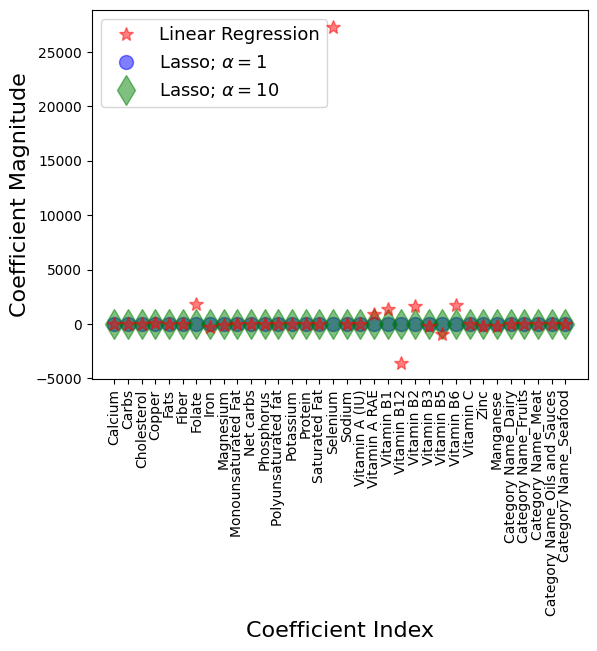

In [57]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Lasso; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Lasso; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='upper left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Regression & Ridge (L2)

In [58]:
from sklearn.linear_model import Ridge

## Perform regresssion with ridge 
## set alpha (weight of penalty term) = 1

X = df[input_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

ridge = Ridge(alpha=1.0)
model = ridge.fit(X_train, y_train)
y_pred = model.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.381212976295401, 0.999550953391046]

In [59]:
[model.coef_, model.intercept_]

[array([-5.43748780e-01,  8.49444832e-01, -1.18925729e-01,  1.35399377e-02,
         9.74439508e+00,  1.29775949e+00, -1.31236689e-03, -2.20774175e-01,
        -6.21746834e+00, -8.92288228e-01,  3.01860335e+00, -2.15568667e+00,
        -9.45420394e-01, -5.39317110e+00,  4.17644699e+00, -8.52091411e-01,
         5.17573845e-04, -3.90853875e-01,  1.52929476e-05,  1.85663639e-03,
         5.19895049e-03,  3.32423237e-06, -7.29624229e-03, -1.19264366e-01,
        -5.84849060e-02, -4.37254978e-03,  8.04746402e-01, -2.05060845e-02,
        -1.48241255e-02, -1.29278903e+00, -1.91234852e+00,  1.86562139e+00,
        -6.12778098e-01,  1.95229426e+00]),
 2.4702102853163126]

In [60]:
index = np.argsort(model.coef_)
coef = [model.coef_[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
update_vars = [input_vars[index[i]] for i in range(len(model.coef_))  if model.coef_[index[i]] != 0]
coef

[-6.2174683439945655,
 -5.3931710958207955,
 -2.155686670251182,
 -1.9123485219543819,
 -1.2927890306107328,
 -0.9454203939912447,
 -0.8922882283459191,
 -0.8520914107150552,
 -0.6127780983639356,
 -0.5437487802743649,
 -0.39085387481301953,
 -0.2207741751578829,
 -0.11926436601900117,
 -0.11892572931601542,
 -0.058484906034510974,
 -0.020506084466886065,
 -0.014824125452493309,
 -0.007296242286277433,
 -0.004372549782713901,
 -0.0013123668861201054,
 3.324232368646562e-06,
 1.529294759725985e-05,
 0.000517573845244293,
 0.00185663639005539,
 0.005198950485953911,
 0.013539937698374102,
 0.8047464022852332,
 0.849444831883984,
 1.2977594896377274,
 1.8656213924745304,
 1.9522942584493128,
 3.018603350241574,
 4.17644699448576,
 9.744395082651945]

In [61]:
update_vars

['Magnesium',
 'Potassium',
 'Phosphorus',
 'Category Name_Fruits',
 'Category Name_Dairy',
 'Polyunsaturated fat',
 'Monounsaturated Fat',
 'Saturated Fat',
 'Category Name_Oils and Sauces',
 'Calcium',
 'Sodium',
 'Iron',
 'Vitamin B3',
 'Cholesterol',
 'Vitamin B5',
 'Zinc',
 'Manganese',
 'Vitamin B2',
 'Vitamin B6',
 'Folate',
 'Vitamin B12',
 'Vitamin A (IU)',
 'Selenium',
 'Vitamin A RAE',
 'Vitamin B1',
 'Copper',
 'Vitamin C',
 'Carbs',
 'Fiber',
 'Category Name_Meat',
 'Category Name_Seafood',
 'Net carbs',
 'Protein',
 'Fats']

In [62]:
ridge = Ridge(alpha=10)
model2 = ridge.fit(X_train, y_train)
y_pred = model2.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[4.10052519816672, 0.999606647730206]

In [63]:
[model2.coef_, model2.intercept_]

[array([-5.88502098e-01,  1.64225561e+00,  7.89457202e-02,  7.21062961e-04,
         9.39254845e+00,  2.05645465e-01, -1.48611787e-04, -1.73178961e-02,
        -7.06583667e-01, -5.37989819e-01,  2.19638334e+00, -5.47161894e-01,
        -5.33111637e-01, -1.85429518e+00,  4.14246469e+00, -4.76015964e-01,
         9.34160790e-05, -4.32608920e-01,  1.51271103e-05,  4.65183668e-04,
         4.35254352e-04, -4.23608641e-07, -1.21032708e-03, -1.23755237e-02,
        -7.01727622e-03, -7.05399707e-04,  4.93581022e-02,  7.23263645e-04,
        -9.97140416e-04, -1.14343316e+00, -9.71670345e-01,  1.48559172e+00,
        -2.57514708e-01,  8.87026495e-01]),
 2.319294275410755]

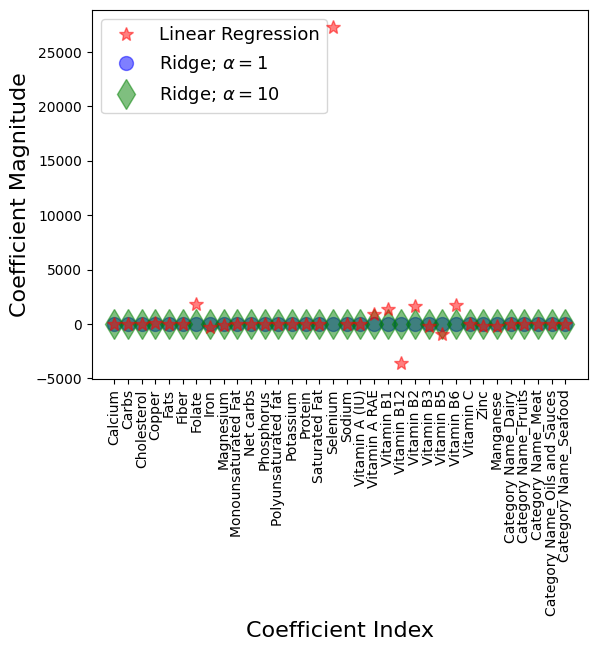

In [64]:
plt.plot(input_vars,lm.coef_,alpha=0.5,linestyle='none',marker='*',markersize=10,color='red',label=r'Linear Regression',zorder=7) # zorder for ordering the markers
plt.plot(input_vars,model.coef_,alpha=0.5,linestyle='none',marker='o',markersize=10,color='blue',label=r'Ridge; $\alpha = 1$') # alpha here is for transparency
plt.plot(input_vars,model2.coef_,alpha=0.5,linestyle='none',marker='d',markersize=15,color='green',label=r'Ridge; $\alpha = 10$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc='upper left')
plt.xticks(input_vars, input_vars, rotation='vertical')
plt.show()

## Random Forest

In [65]:
df = dummy_df.copy().dropna()
df = df.dropna()

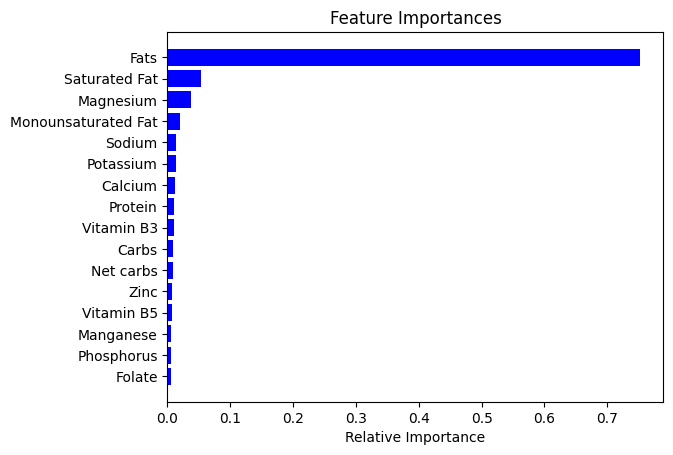

In [66]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=10,n_estimators=100)
model.fit(df[input_vars],df['Calories'])

n_features = 16

# Plot feature importance
features = df[input_vars].columns
importances = model.feature_importances_
indices = np.argsort(importances)[-n_features:]  # sort top n features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [67]:
important_features = [features[i] for i in indices]
important_features
updated_vars = []
for i in range(-1,-n_features-1,-1):
    updated_vars.append(important_features[i])
updated_vars

['Fats',
 'Saturated Fat',
 'Magnesium',
 'Monounsaturated Fat',
 'Sodium',
 'Potassium',
 'Calcium',
 'Protein',
 'Vitamin B3',
 'Carbs',
 'Net carbs',
 'Zinc',
 'Vitamin B5',
 'Manganese',
 'Phosphorus',
 'Folate']

In [68]:
X = df[updated_vars]
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
[np.sqrt(metrics.mean_squared_error(y_test,y_pred)),metrics.r2_score(y_test,y_pred)]

[5.179829296332254, 0.9993723268001357]